In [2]:
import tensorflow as tf
import numpy as np

In [46]:
def neural_net(X):
        
        H = 2.0*(X + 1)/(2) - 1.0
        
        return H
            
def net_u(x, t):  
    u = neural_net(tf.concat([x,t],1))
    return u
    
def net_f(x, t):
    u = net_u(x,t)
    print(u)
    u_t = tf.gradients(u, t)[0]
    print(u_t)
    u_x = tf.gradients(u, x)[0]
    print(u_x)
    u_xx = tf.gradients(u_x, x)[0]
    f = u_t + u*u_x - u_xx

    return f

In [47]:
N = 100
X = np.zeros((N, N))
X[N//2, N//2] = 10

In [48]:
net_f(R, T)

Tensor("sub_5:0", shape=(100, 512), dtype=float64)
None
None


AttributeError: 'NoneType' object has no attribute 'op'

In [22]:
X.shape

(100, 100)

In [23]:
tf.concat([X,X],1)

<tf.Tensor 'concat_5:0' shape=(100, 200) dtype=float64>

In [25]:
import scipy.io

In [26]:
data = scipy.io.loadmat('burgers_shock.mat')
    
t = data['t'].flatten()[:,None]
x = data['x'].flatten()[:,None]

In [27]:
R, T = np.meshgrid(x, t)
tf.concat([R, T], 1)

<tf.Tensor 'concat:0' shape=(100, 512) dtype=float64>

In [38]:
net_u(R, t)

ValueError: Dimensions must be equal, but are 257 and 100 for 'MatMul_105' (op: 'MatMul') with input shapes: [100,257], [100,257].

In [39]:
Exact = np.real(data['usol']).T # T x N

In [41]:
Exact.shape

(100, 256)

In [43]:
R.shape

(100, 256)

In [44]:
from matplotlib import pyplot as plt

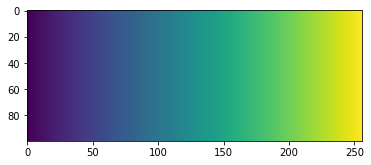

In [47]:
plt.imshow(R)

In [50]:
idx_t0 = 10
idx_t1 = 90
dt = t[idx_t1] - t[idx_t0]

noise_u0 = 0.0
idx_x = np.random.choice(Exact.shape[1], N, replace=False) 
x0 = x[idx_x,:]
u0 = Exact[idx_t0:idx_t0+1,idx_x].T
u0 = u0 + noise_u0*np.std(u0)*np.random.randn(u0.shape[0], u0.shape[1])

In [51]:
u0.shape

(100, 1)